In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
df = pd.read_csv('voice.csv')

In [3]:
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
df.shape

(3168, 21)

In [5]:
df.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

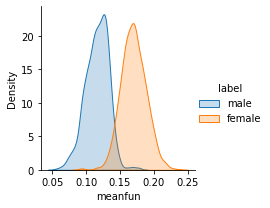

In [6]:
fig = sns.FacetGrid(df, hue="label")
fig.map(sns.kdeplot, "meanfun", shade=True)
fig.add_legend()

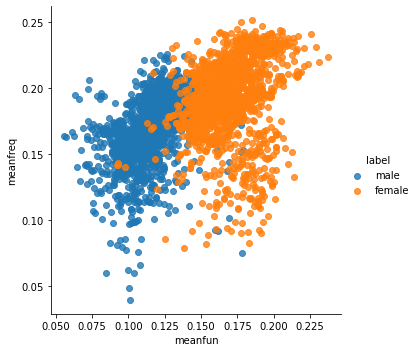

In [7]:
sns.lmplot(x='meanfun',y='meanfreq',hue='label',data=df,fit_reg=False)

In [8]:
data_train = df.sample(frac=0.7, random_state=1)
data_test = df.drop(data_train.index)

In [9]:
X_train = data_train.drop(['label'],axis=1)
y_train = data_train['label']
X_test = data_test.drop(['label'],axis=1)
y_test = data_test['label']

#  LogisticRegression

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
model = LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Logistic Regression is',accuracy_score(prediction,y_test))

The accuracy of the Logistic Regression is 0.9073684210526316


# DecisionTreeClassifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('The accuracy of the Decision Tree is',accuracy_score(prediction,y_test))

The accuracy of the Decision Tree is 0.9673684210526315


# RandomForestClassifier

In [12]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
Accuracy=model.score(X_test,y_test)
print('Accuracy:{}'.format(Accuracy*100))

Accuracy:98.42105263157895


# SupportVectorMachine

In [15]:
from sklearn.svm import SVC
model=SVC(kernel='linear',random_state=0)
model.fit(X_train,y_train)
prediction=model.predict(X_test)
Accuracy=model.score(X_test,y_test)
print('Accuracy:{}'.format(Accuracy*100))

Accuracy:92.0


Text(0.5, 1.0, 'Importance des caracteristiques')

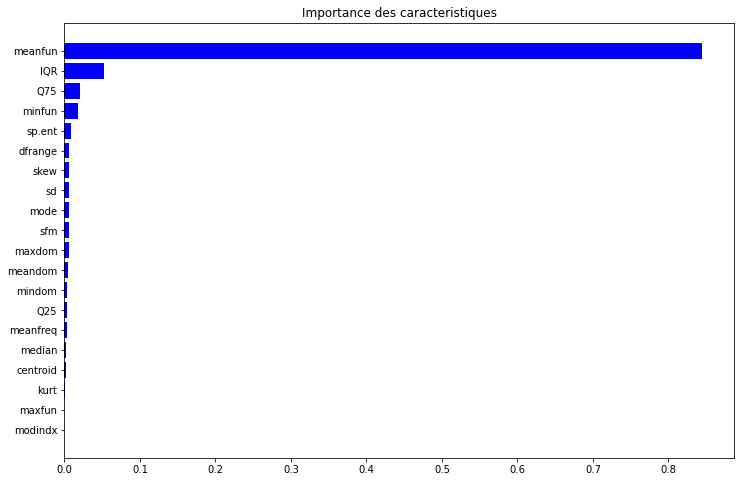

In [13]:
importances = model.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,8))
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), df.columns[indices])
plt.title('Importance des caracteristiques')
plt.Text(0.5, 1.0, 'Importance des caracteristiques')